In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 14.4 MB/s eta 0:00:00


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Datasets")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.utils.plotting import plot_series

In [ ]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

In [ ]:
y_train, y_test = temporal_train_test_split(df,test_size=12)

In [ ]:
y_train.shape

(156, 1)

In [ ]:
y_test.shape

(12, 1)

In [ ]:
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
regressor = RandomForestRegressor(random_state=23)

In [ ]:
forecaster = make_reduction(regressor,window_length=7)
forecaster

RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(random_state=23),
                                     window_length=7)

In [ ]:
forecaster.fit(y_train)

RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(random_state=23),
                                     window_length=7)

In [ ]:
y_pred = forecaster.predict(fh)
rmse = MeanSquaredError(square_root=True)
print(rmse(y_test, y_pred))

80.39071339402332


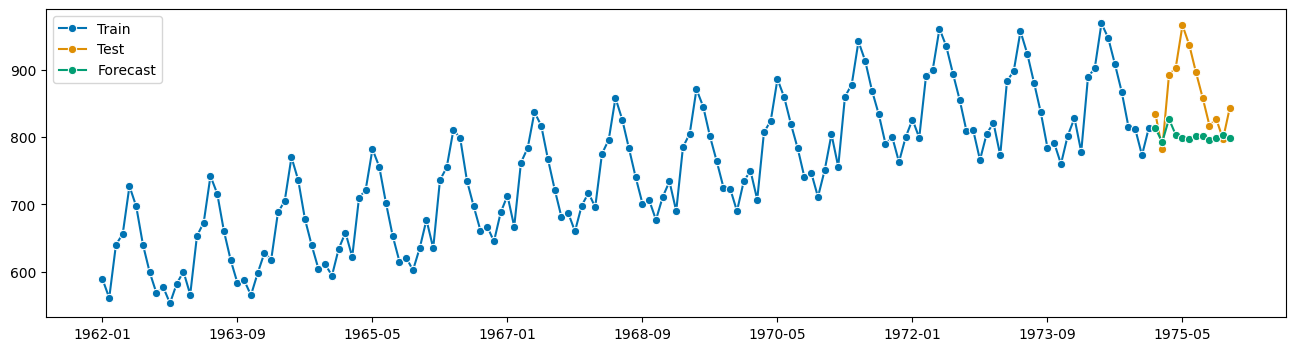

In [ ]:
plot_series(y_train,y_test,y_pred , labels=['Train','Test','Forecast'])
plt.show()

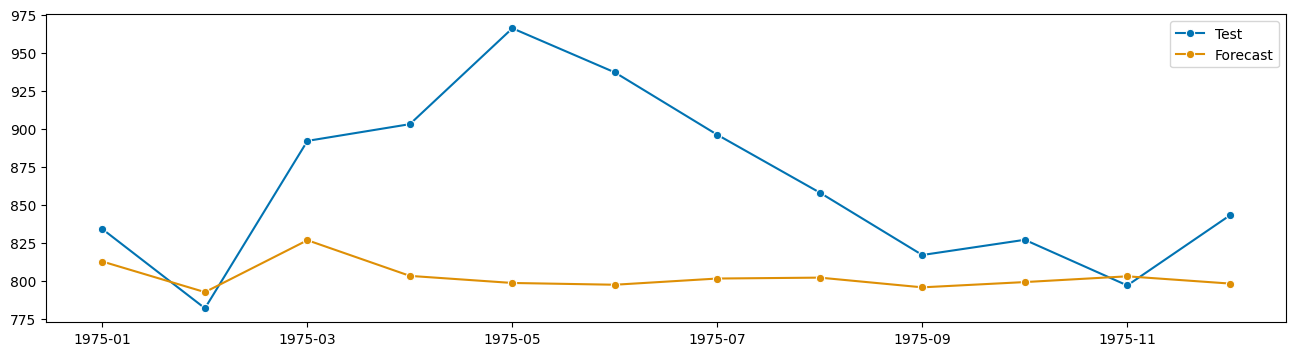

In [ ]:
plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()

**Basic Grid Search**

In [ ]:
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter

In [ ]:
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [7, 12, 15]}

We fit the forecaster on an initial window which is 80% of the historical data
then use temporal sliding window cross-validation to find the optimal hyper-parameters


In [ ]:
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=20)
gscv = ForecastingGridSearchCV(
    forecaster, strategy="refit", cv=cv, param_grid=param_grid
)

In [ ]:
gscv.fit(y_train)

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/model_selection/_tune.py:198: UserWarning: in ForecastingGridSearchCV, n_jobs and pre_dispatch parameters are deprecated and will be removed in 0.26.0. Please use n_jobs and pre_dispatch directly in the backend_params argument instead.
  warn(


ForecastingGridSearchCV(cv=SlidingWindowSplitter(initial_window=124,
                                                 window_length=20),
                        forecaster=RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(random_state=23),
                                                                        window_length=15),
                        param_grid={'window_length': [7, 12, 15]})

In [ ]:
print(gscv.best_params_)

{'window_length': 7}


In [ ]:
print(gscv.best_score_)

0.02683423009024043


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

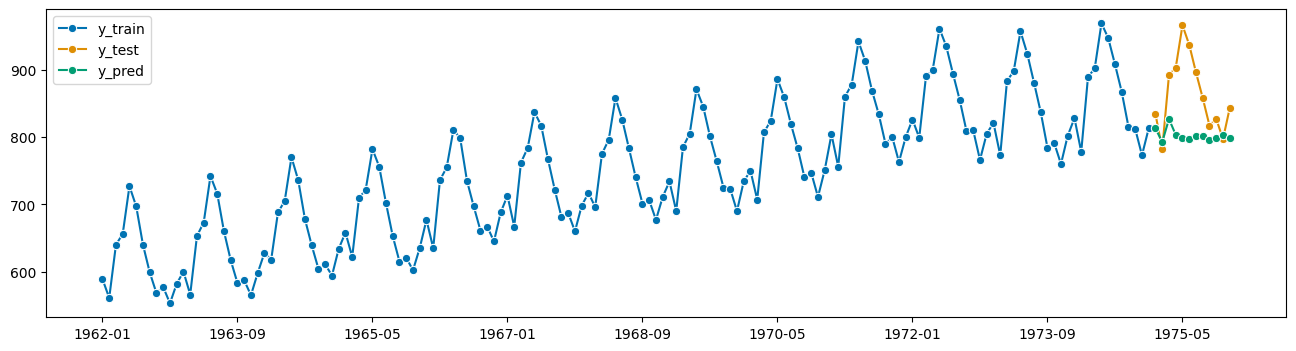

In [ ]:
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
print(rmse(y_test, y_pred))

80.39071339402332


**Composite Grid Search**

In [ ]:
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [6,7,8,9,10],
              'estimator__max_features':[2,3,4,5]}
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)

In [ ]:
gscv.fit(y_train)

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/model_selection/_tune.py:198: UserWarning: in ForecastingGridSearchCV, n_jobs and pre_dispatch parameters are deprecated and will be removed in 0.26.0. Please use n_jobs and pre_dispatch directly in the backend_params argument instead.
  warn(


In [ ]:
print(gscv.best_params_)

In [ ]:
print(gscv.best_score_)

In [ ]:
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
print(rmse(y_test, y_pred))

In [ ]:
plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()